In [1]:

import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq
from dataclasses import dataclass
import datetime
import hvplot.pandas 
import numpy as np
import matplotlib.pyplot as plt
from typing import List
# hv.renderer('bokeh').theme = 'dark_minimal'


# Data Loading
It is always a good advice to use standard formats to transfer data from one computer to another. One of the most used formats is parquet. The following code should help you to load the data into your python environment.

In [ ]:



dataset_root = Path("./Dataset")


@dataclass
class Case():
    info: pd.DataFrame
    measurements: pd.DataFrame


class RawDataset():

    def __init__(self, root, unit = "VG4", load_training=False, load_synthetic=False) -> None:
        
        
        read_pq_file = lambda f: pq.read_table(root / f).to_pandas()
        
        
        cases = {
            "test": [f"{unit}_generator_data_testing_real_measurements.parquet", root / f"{unit}_generator_data_testing_real_info.csv" ], 
        }
        
        if load_training:
            cases = {
                **cases,
                "train": [f"{unit}_generator_data_training_measurements.parquet", root / f"{unit}_generator_data_training_info.csv" ], 
            }
        
        if load_synthetic:
            cases = {
                **cases,
                "test_s01": [f"{unit}_generator_data_testing_synthetic_01_measurements.parquet", root / f"{unit}_generator_data_testing_synthetic_01_info.csv"], 
                "test_s02": [f"{unit}_generator_data_testing_synthetic_02_measurements.parquet", root / f"{unit}_generator_data_testing_synthetic_02_info.csv"]
            }
        
        
        self.data_dict = dict()
        
        for id_c, c in cases.items():
            # if you need to verify the parquet header:
            # pq_rows = RawDataset.read_parquet_schema_df(root / c[0])
            info = pd.read_csv(c[1])
            measurements = read_pq_file(c[0])
            self.data_dict[id_c] = Case(info, measurements)
            
        
        
    @staticmethod
    def read_parquet_schema_df(uri: str) -> pd.DataFrame:
        """Return a Pandas dataframe corresponding to the schema of a local URI of a parquet file.

        The returned dataframe has the columns: column, pa_dtype
        """
        # Ref: https://stackoverflow.com/a/64288036/
        schema = pq.read_schema(uri, memory_map=True)
        schema = pd.DataFrame(({"column": name, "pa_dtype": str(pa_dtype)} for name, pa_dtype in zip(schema.names, schema.types)))
        schema = schema.reindex(columns=["column", "pa_dtype"], fill_value=pd.NA)  # Ensures columns in case the parquet file has an empty dataframe.
        return schema
    



rds_u4 = RawDataset(dataset_root, "VG4", load_synthetic=False, load_training=True)
rds_u5 = RawDataset(dataset_root, "VG5", load_synthetic=True, load_training=True)
rds_u6 = RawDataset(dataset_root, "VG6", load_synthetic=True)




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Raffael\\Documents\\Datasets\\alpiq_2023/VG4_generator_data_testing_real_info.csv'

In [ ]:
read_pq_file = lambda f: pq.read_table(dataset_root / f).to_pandas()


for f in (dataset_root / "synthetic_anomalies").glob("*.parquet"):
    print(f.name, f.stat().st_size / 1024**2, "MB")
    mdata = RawDataset.read_parquet_schema_df(f)
    print("ground_truth" in mdata.column.values)
    
read_pq_file(f)

VG5_anomaly_01_type_a.parquet 88.01739311218262 MB
True
VG5_anomaly_01_type_b.parquet 86.73019886016846 MB
True
VG5_anomaly_01_type_c.parquet 86.25093841552734 MB
True
VG5_anomaly_02_type_a.parquet 91.36489772796631 MB
True
VG5_anomaly_02_type_b.parquet 92.52024936676025 MB
True
VG5_anomaly_02_type_c.parquet 91.63772583007812 MB
True
VG6_anomaly_01_type_a.parquet 93.58686256408691 MB
True
VG6_anomaly_01_type_b.parquet 92.17714786529541 MB
True
VG6_anomaly_01_type_c.parquet 91.5269603729248 MB
True
VG6_anomaly_02_type_a.parquet 77.13362503051758 MB
True
VG6_anomaly_02_type_b.parquet 75.7098970413208 MB
True
VG6_anomaly_02_type_c.parquet 75.76039600372314 MB
True


NameError: name 'root' is not defined

In [ ]:
"ground_truth" in mdata.column.values

True

In [ ]:
RawDataset.read_parquet_schema_df(dataset_root / "VG4_generator_data_testing_real_measurements.parquet")

column               pa_dtype
0                     tot_activepower                 double
1                           plant_tmp                 double
2                             ext_tmp                 double
3              water_primary_cold_tmp                 double
4               water_primary_hot_tmp                 double
5                       valve_opening                 double
6                    refri_bath_level                 double
7                     aspi_bath_level                 double
8                         canal_level                 double
9                           canal_tmp                 double
10  water_primary_filter_out_pressure                 double
11   water_primary_filter_in_pressure                 double
12                           lake_tmp                 double
13                   coupler_position                 double
14                  tot_reactivepower                 double
15                injector12_pressure                 double
16                injector34_pressure                 double
17                      pump_rotspeed                 double
18                injector_01_opening                 double
19                injector_02_opening                 double
20                injector_03_opening                 double
21                injector_04_opening                 double
22                   turbine_rotspeed                 double
23                           exc_freq                 double
24                        exc_current                 double
25                        exc_voltage                 double
26                        powerfactor                 double
27                          elec_freq                 double
28                       ph01_current                 double
29                       ph02_current                 double
30                       ph03_current                 double
31                       ph01_voltage                 double
32                       ph12_voltage                 double
33                       ph02_voltage                 double
34                       ph23_voltage                 double
35                       ph03_voltage                 double
36                       ph31_voltage                 double
37                   air_circ_hot_tmp                 double
38               air_circ_cold_01_tmp                 double
39               air_circ_cold_02_tmp                 double
40                   stat_magn_01_tmp                 double
41                   stat_magn_02_tmp                 double
42              stat_coil_ph01_01_tmp                 double
43              stat_coil_ph01_02_tmp                 double
44              stat_coil_ph02_01_tmp                 double
45              stat_coil_ph03_01_tmp                 double
46              stat_coil_ph03_02_tmp                 double
47              water_circ_hot_01_tmp                 double
48              water_circ_hot_02_tmp                 double
49                water_circ_cold_tmp                 double
50                         machine_on                   bool
51                        machine_off                   bool
52                       turbine_mode                   bool
53                                all                   bool
54           equilibrium_turbine_mode                   bool
55                        dyn_only_on                   bool
56                          pump_mode                   bool
57              equilibrium_pump_mode                   bool
58                  __index_level_0__  timestamp[ns, tz=CET]

In [ ]:
rds_u5.data_dict.keys()

dict_keys(['test', 'train', 'test_s01', 'test_s02'])

In [ ]:
mode_columns = ["machine_on", "machine_off", "turbine_mode", "equilibrium_turbine_mode", "dyn_only_on", "pump_mode", "equilibrium_pump_mode"]
mode_columns = [ "turbine_mode", "equilibrium_turbine_mode", "dyn_only_on", "pump_mode", "equilibrium_pump_mode"]
mode_columns = ["machine_on", "machine_off"]
rds_u6.data_dict["test_s02"].measurements[::].hvplot.explorer(y=mode_columns)

BokehModel(combine_events=True, render_bundle={'docs_json': {'ba55f514-b002-4de8-adb0-9919d1ea270b': {'version…

<Axes: >

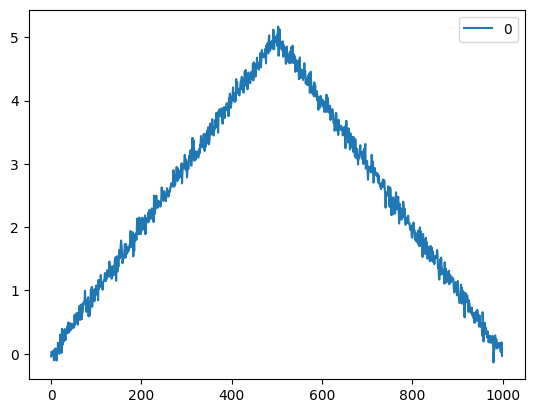

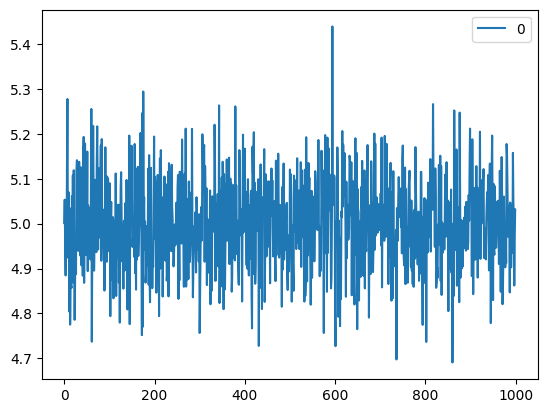

In [ ]:

def ramp_anomaly(T = 100, sigma = 0.5, max_y=5.0):
    dx = max_y/(T/2)
    delta = np.arange(0,T).astype(float)
    f = lambda x: np.piecewise(x, 
            [x < T//2, x >= T//2], 
            [lambda x: dx*x, 
            lambda x: -dx*(x-T)
        ])
    return f(delta) + np.random.normal(0, sigma, T)

def constant_anomaly(T = 100, sigma = 0.5, max_y=5.0):
    return np.random.normal(0, sigma, T) + max_y

pd.DataFrame(ramp_anomaly(sigma=0.1, T=1000)).plot()
pd.DataFrame(constant_anomaly(sigma=0.1, T=1000)).plot()

In [ ]:
df = rds_u5.data_dict["test_s01"].measurements

anomaly_56_cols = df.columns[
    df.columns.str.endswith("_tmp") 
    & (~df.columns.isin(["ext_tmp", "plant_tmp"]) 
    & (df.columns.str.contains("06") | df.columns.str.contains("05")))

]
anomaly_control_cols = df.columns[df.columns.isin([f"injector_0{i}_opening" for i in range(2,4)])]

anomaly_cooling_cols = df.columns[
    df.columns.isin(["plant_tmp"])
]

anomaly_cols = [anomaly_56_cols, anomaly_control_cols, anomaly_cooling_cols]
print(df.columns)
print(anomaly_56_cols)
print(anomaly_control_cols)
print(anomaly_cooling_cols)

Index(['tot_activepower', 'ext_tmp', 'plant_tmp', 'charge', 'coupler_position',
       'injector_01_opening', 'injector_02_opening', 'injector_03_opening',
       'injector_04_opening', 'injector_05_opening', 'pump_calculated_flow',
       'pump_pressure_diff', 'pump_rotspeed', 'tot_current',
       'tot_effectivepower', 'tot_reactivepower', 'turbine_pressure',
       'turbine_rotspeed', 'water_primary_pump_01_opening',
       'water_primary_pump_02_opening', 'air_circ_cold_01_tmp',
       'air_circ_cold_02_tmp', 'air_circ_cold_03_tmp', 'air_circ_cold_04_tmp',
       'air_circ_cold_05_tmp', 'air_circ_cold_06_tmp', 'air_circ_hot_01_tmp',
       'air_circ_hot_02_tmp', 'air_circ_hot_03_tmp', 'air_circ_hot_04_tmp',
       'air_circ_hot_05_tmp', 'air_circ_hot_06_tmp', 'elec_freq',
       'exc_current', 'exc_voltage', 'mid_voltage', 'neutral_current',
       'ph01_current', 'ph01_voltage', 'ph12_voltage', 'ph02_current',
       'ph02_voltage', 'ph23_voltage', 'ph03_current', 'ph03_voltage',


172740


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 06:07:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 06:56:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-12 06:56:00+02:

delta                sample_time  start_index                 start_time  \
0   3615  2021-06-02 06:07:30+02:00       3615.0  2021-06-02 06:56:00+02:00   
1  29090  2021-06-22 08:33:00+02:00      61506.0  2021-06-22 10:52:00+02:00   
2   6598  2021-07-04 15:32:30+02:00      96905.0  2021-07-04 16:59:00+02:00   

                    end_time  end_index                 data_start  \
0  2021-06-12 06:56:00+02:00    32416.0  2021-06-02 06:56:00+02:00   
1  2021-07-02 10:52:00+02:00    90307.0  2021-06-22 10:52:00+02:00   
2  2021-07-14 16:59:00+02:00   125706.0  2021-07-04 16:59:00+02:00   

                    data_end anomaly_length  
0  2021-06-12 06:56:00+02:00          28801  
1  2021-07-02 10:52:00+02:00          28801  
2  2021-07-14 16:59:00+02:00          28801

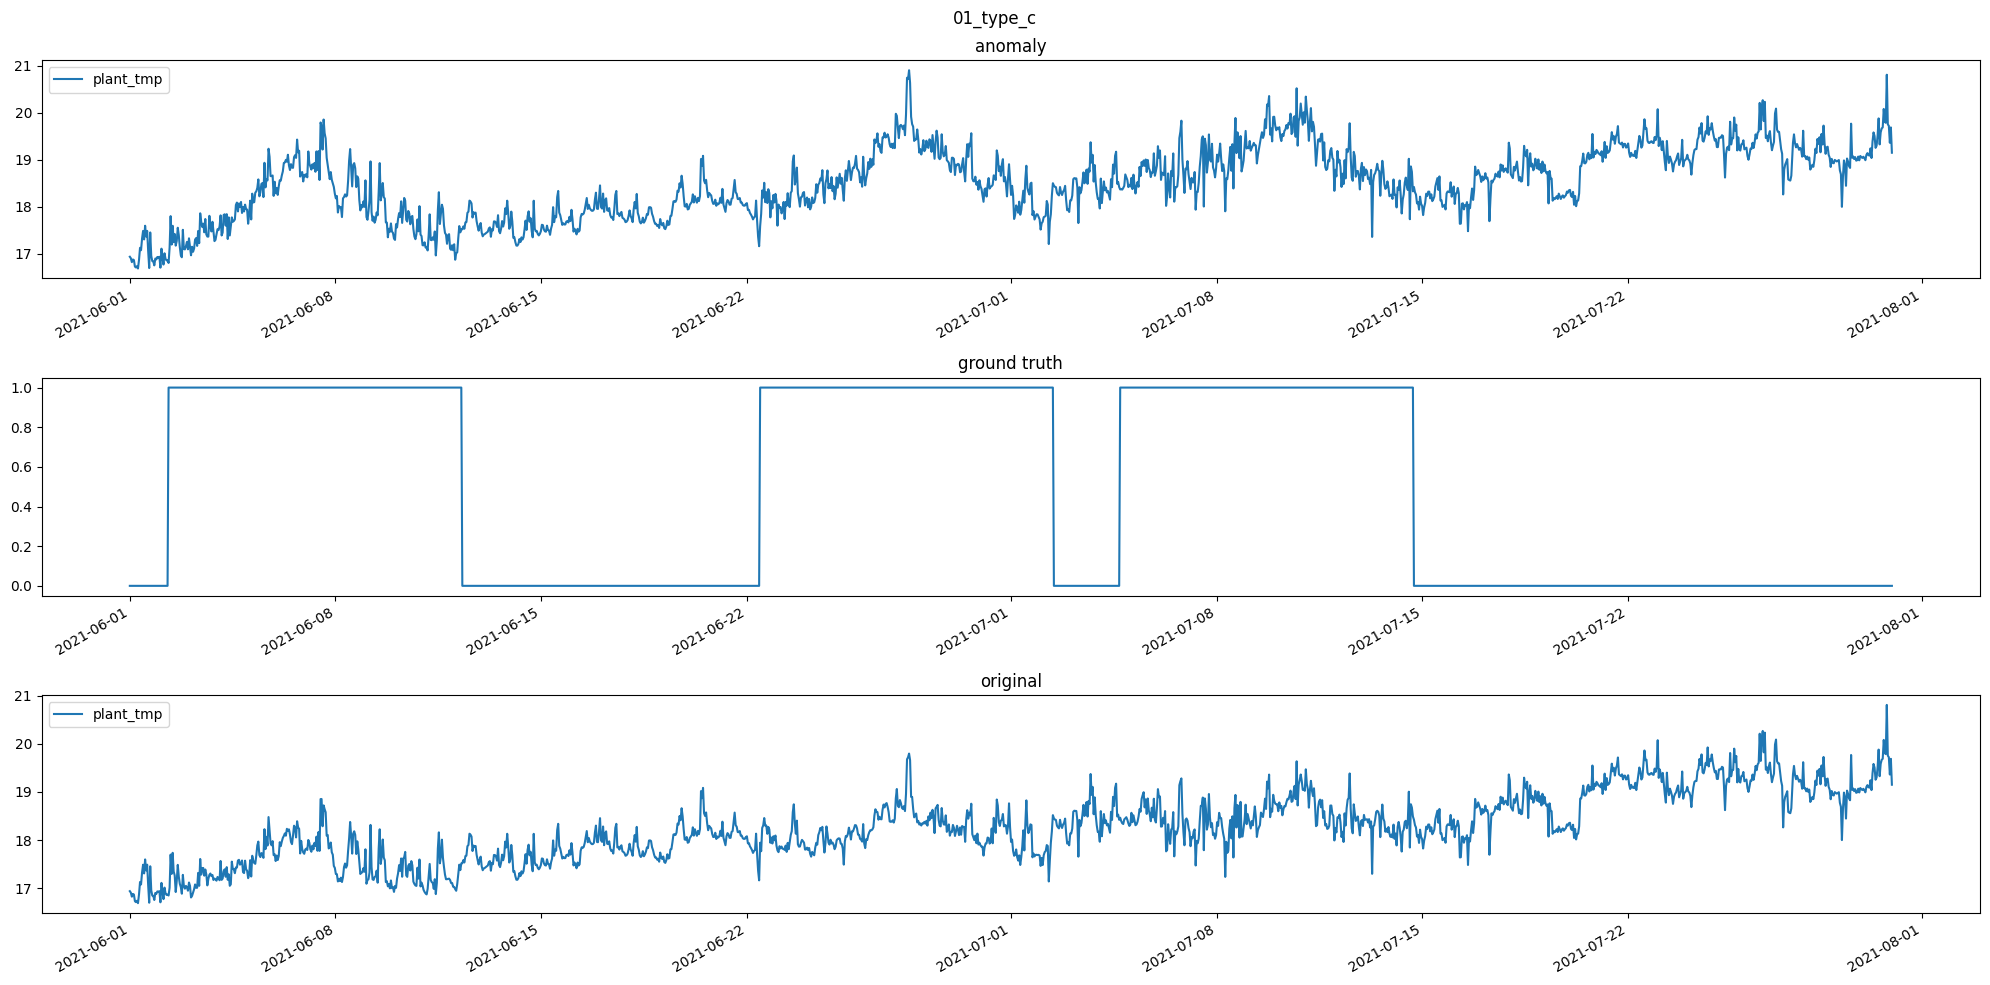

In [ ]:
def add_anomalies(df, anomaly_f, anomaly_columns: List[bool], N_anomalies=3, anomaly_f_args={}, anomaly_duration_days=10, random_seed=3, only_for_machine_on_state=True):
    df = df.copy()
    N = df.shape[0]
    print(N)

    n_days_index = lambda d, n=10: pd.date_range(d, end = d+datetime.timedelta(days=n), freq=datetime.timedelta(seconds=30))

    # sample anomaly start times and find the machine on date closest to it
    np.random.seed(random_seed); anomaly_info = pd.DataFrame(np.random.exponential(scale=N/8, size=N_anomalies).astype(int), columns=["delta"])


    def shift_anomaly_date(date, df):
        """Shift the anomaly date to the closest machine_on_date"""
        df = df.loc[date:]
        return(df[df["machine_on"]].iloc[0,:].name)
    
    for id_c, row in anomaly_info.iterrows():
        start_index = int(row.delta + (0 if id_c == 0 else anomaly_info.loc[id_c -1, "end_index"]))
        
        anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
        anomaly_info.loc[id_c, "start_index"] = start_index
        anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
        anomaly_duration = n_days_index(anomaly_info.loc[id_c, "start_time"] , anomaly_duration_days)
        anomaly_info.loc[id_c, "start_time"] = anomaly_duration[0]
        anomaly_info.loc[id_c, "end_time"] = anomaly_duration[-1]
        anomaly_info.loc[id_c, "end_index"] = start_index + len(anomaly_duration)

    # some analysis code
    # anomaly_info['start_index'].plot.hist(bins=100)
    # df.loc[n_days_index(anomaly_info.start_time[0] , anomaly_duration_days)][["machine_on"]].astype(int).plot()

    df["ground_truth"] = np.zeros(N)
    for id_d, d in enumerate(anomaly_info.start_time):
        idx = n_days_index(d, anomaly_duration_days)
        # df index may not be continuous
        idx = idx[idx.isin(df.index)]
        df_nd = df.loc[idx, anomaly_columns]
        
        if only_for_machine_on_state:
            machine_on = df.loc[idx, "machine_on"]
            df_nd_on = df_nd.iloc[machine_on.values]
        else:
            df_nd_on = df_nd
        
        anomaly_info.loc[id_d, "data_start"] = str(df_nd_on.index[0])
        anomaly_info.loc[id_d, "data_end"] = str(df_nd_on.index[-1])
        anomaly_info.loc[id_d, "anomaly_length"] = str(df_nd_on.shape[0])
        
        anomalies = np.stack([anomaly_f(T=df_nd_on.shape[0], **anomaly_f_args) for _ in range(df_nd.shape[1])]).T
        df.loc[df_nd_on.index, anomaly_columns] += anomalies
        df.loc[df_nd_on.index, "ground_truth"] = np.ones(df_nd_on.shape[0])

    return anomaly_info, df



@dataclass
class AnomalyDef():
    columns: list[str]
    f_args: dict
    random_seed: int
    title: str
    unit: str
    anomaly_f: callable
    N_anomalies: int = 3
    anomaly_duration_days: int = 10
    only_for_machine_on_state: bool = True

def create_anomaly(df, adef: AnomalyDef):
    info, df_an = add_anomalies(
        df, 
        adef.anomaly_f, 
        anomaly_f_args=adef.f_args, 
        anomaly_columns=adef.columns, 
        random_seed=adef.random_seed, 
        N_anomalies=adef.N_anomalies, 
        anomaly_duration_days=adef.anomaly_duration_days,
        only_for_machine_on_state=adef.only_for_machine_on_state
    )
    
    fig, ax = plt.subplots(3,1,figsize=(20,10))
    df_an[adef.columns][::100].plot(ax=ax[0], title="anomaly")
    df_an["ground_truth"][::100].plot(ax=ax[1], title="ground truth")
    df[adef.columns][::100].plot(ax=ax[2], title="original")
    fig.suptitle(adef.title)
    df_an.to_parquet(dataset_root / "synthetic_anomalies" / f"{adef.unit}_anomaly_{adef.title}.parquet")
    fig.tight_layout()
    fig.savefig(dataset_root / "synthetic_anomalies" / f"{adef.unit}_anomaly_{adef.title}.png")
    return info
    
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_cooling_cols, f_args={"max_y": 1.0, "sigma": 0.1}, random_seed=12, title="01_type_c", unit="VG5", only_for_machine_on_state=False))

172740


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-12 01:29:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-12 03:00:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-22 03:00:30+02:

172740


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-15 03:57:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-15 05:54:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-25 05:54:30+02:

172740


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 06:07:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 06:56:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-12 06:56:00+02:

172737


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-01 08:59:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-01 08:59:00+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-11 08:59:00+02:

172737


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-16 07:16:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-16 07:16:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-26 07:16:30+02:

172737


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 18:03:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-02 18:03:30+02:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-06-12 18:03:30+02:

delta                sample_time  start_index                 start_time  \
0   5047  2021-06-02 18:03:30+02:00       5047.0  2021-06-02 18:03:30+02:00   
1  14189  2021-06-17 16:18:30+02:00      48037.0  2021-06-17 16:18:30+02:00   
2  11781  2021-07-01 18:29:30+02:00      88619.0  2021-07-01 18:29:30+02:00   

                    end_time  end_index                 data_start  \
0  2021-06-12 18:03:30+02:00    33848.0  2021-06-02 18:03:30+02:00   
1  2021-06-27 16:18:30+02:00    76838.0  2021-06-17 16:18:30+02:00   
2  2021-07-11 18:29:30+02:00   117420.0  2021-07-01 18:29:30+02:00   

                    data_end anomaly_length  
0  2021-06-12 18:03:30+02:00          28801  
1  2021-06-27 16:18:30+02:00          28801  
2  2021-07-11 18:29:30+02:00          28801

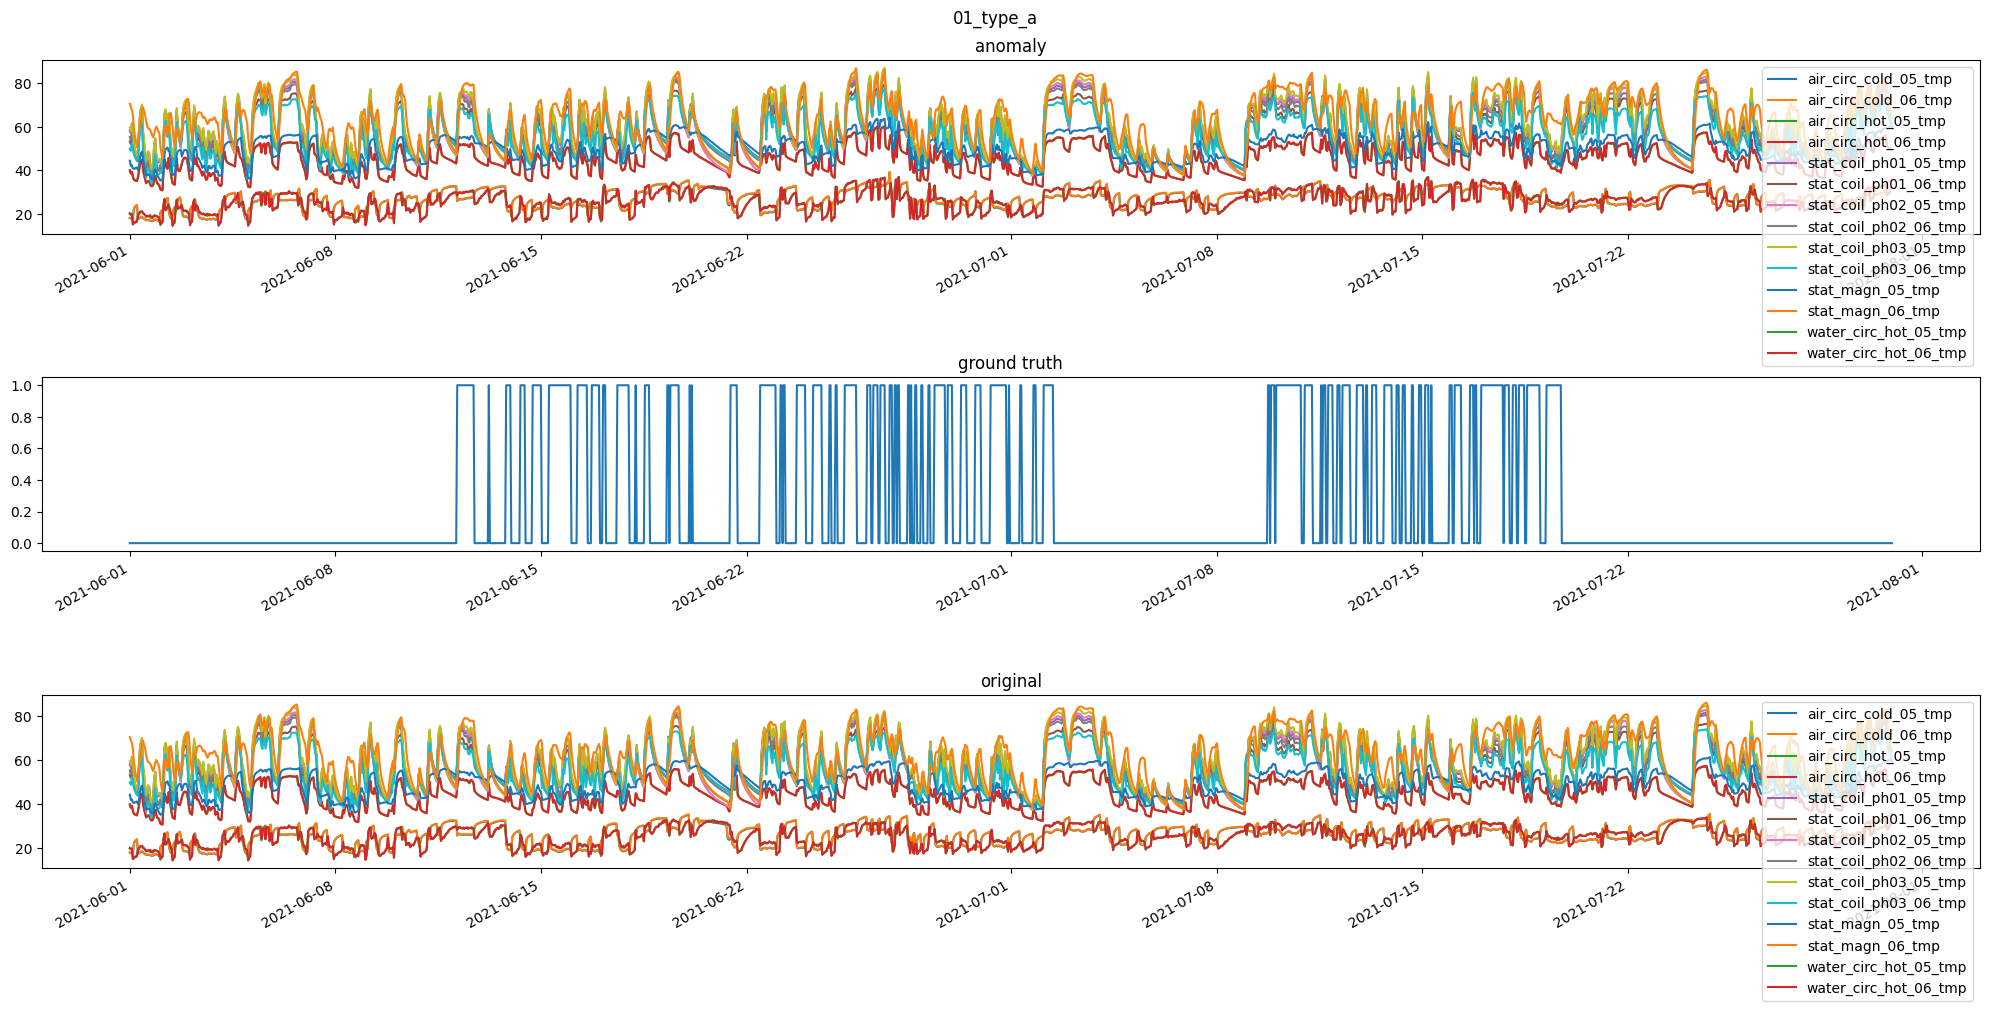

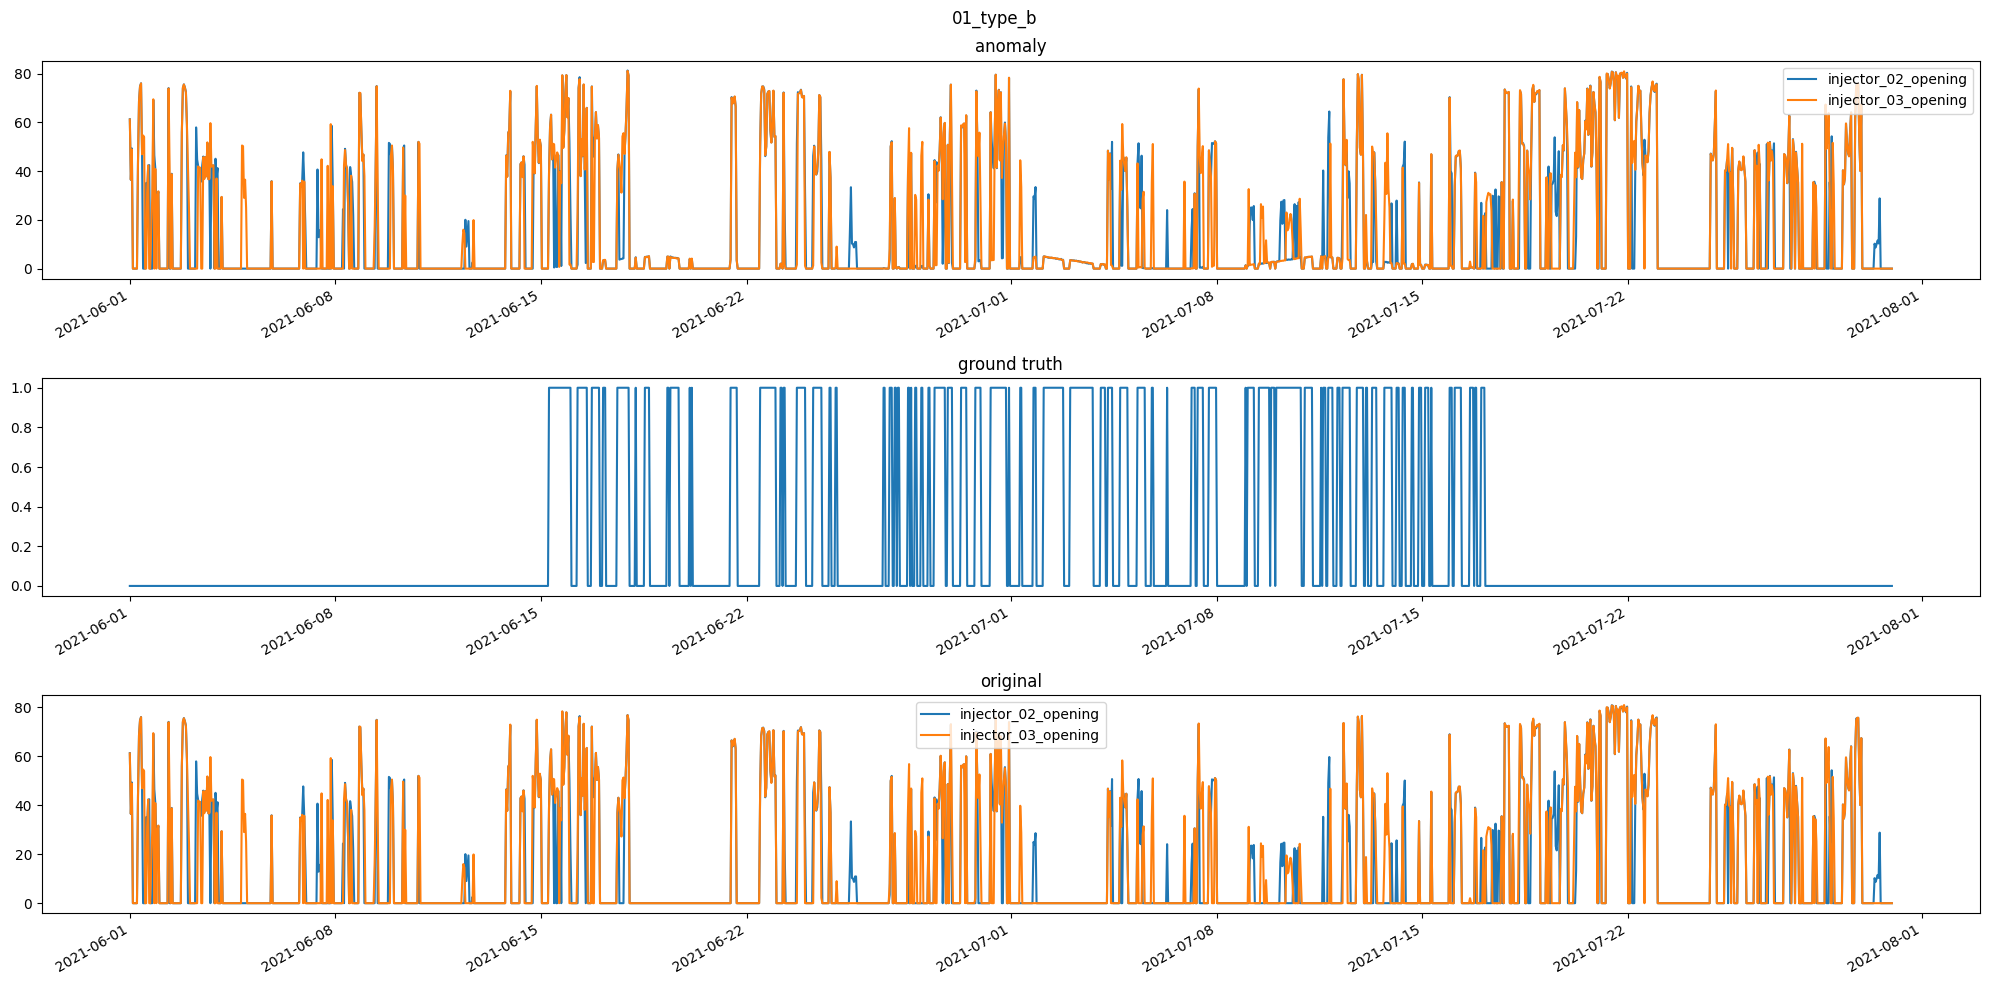

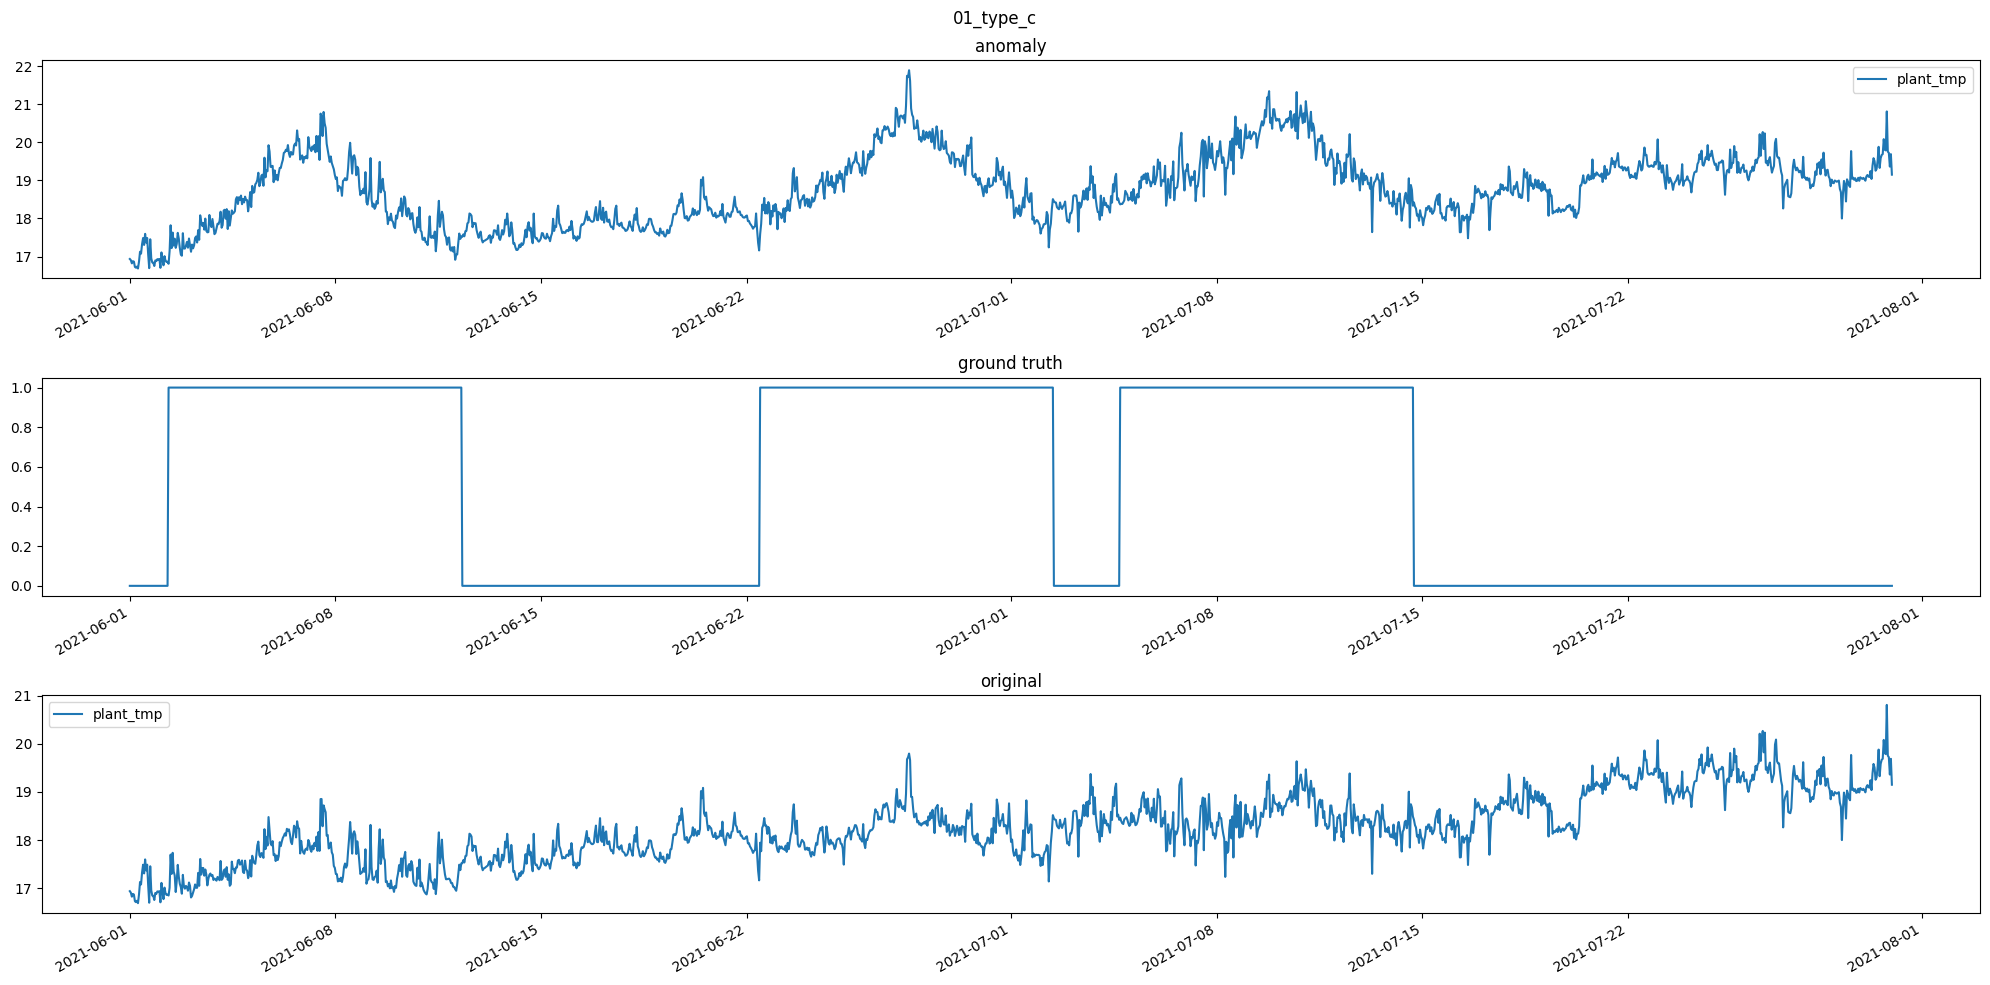

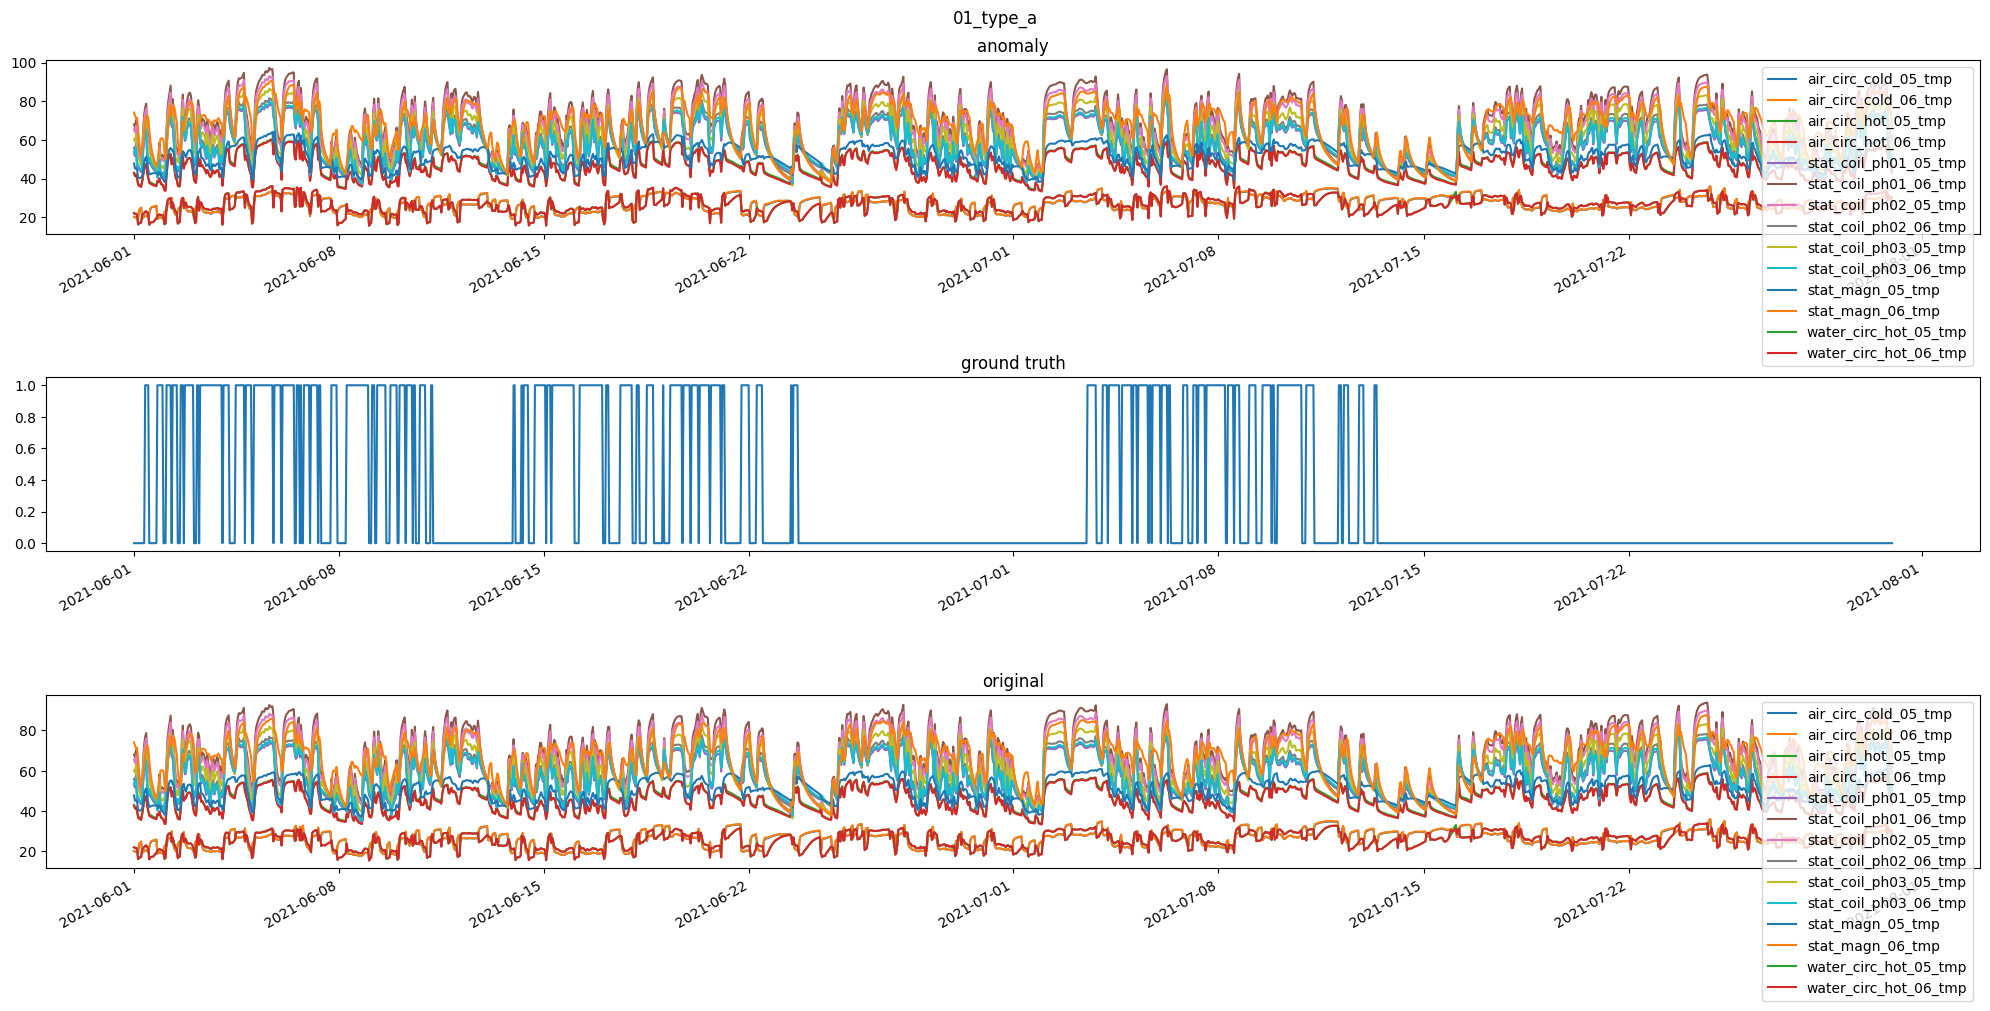

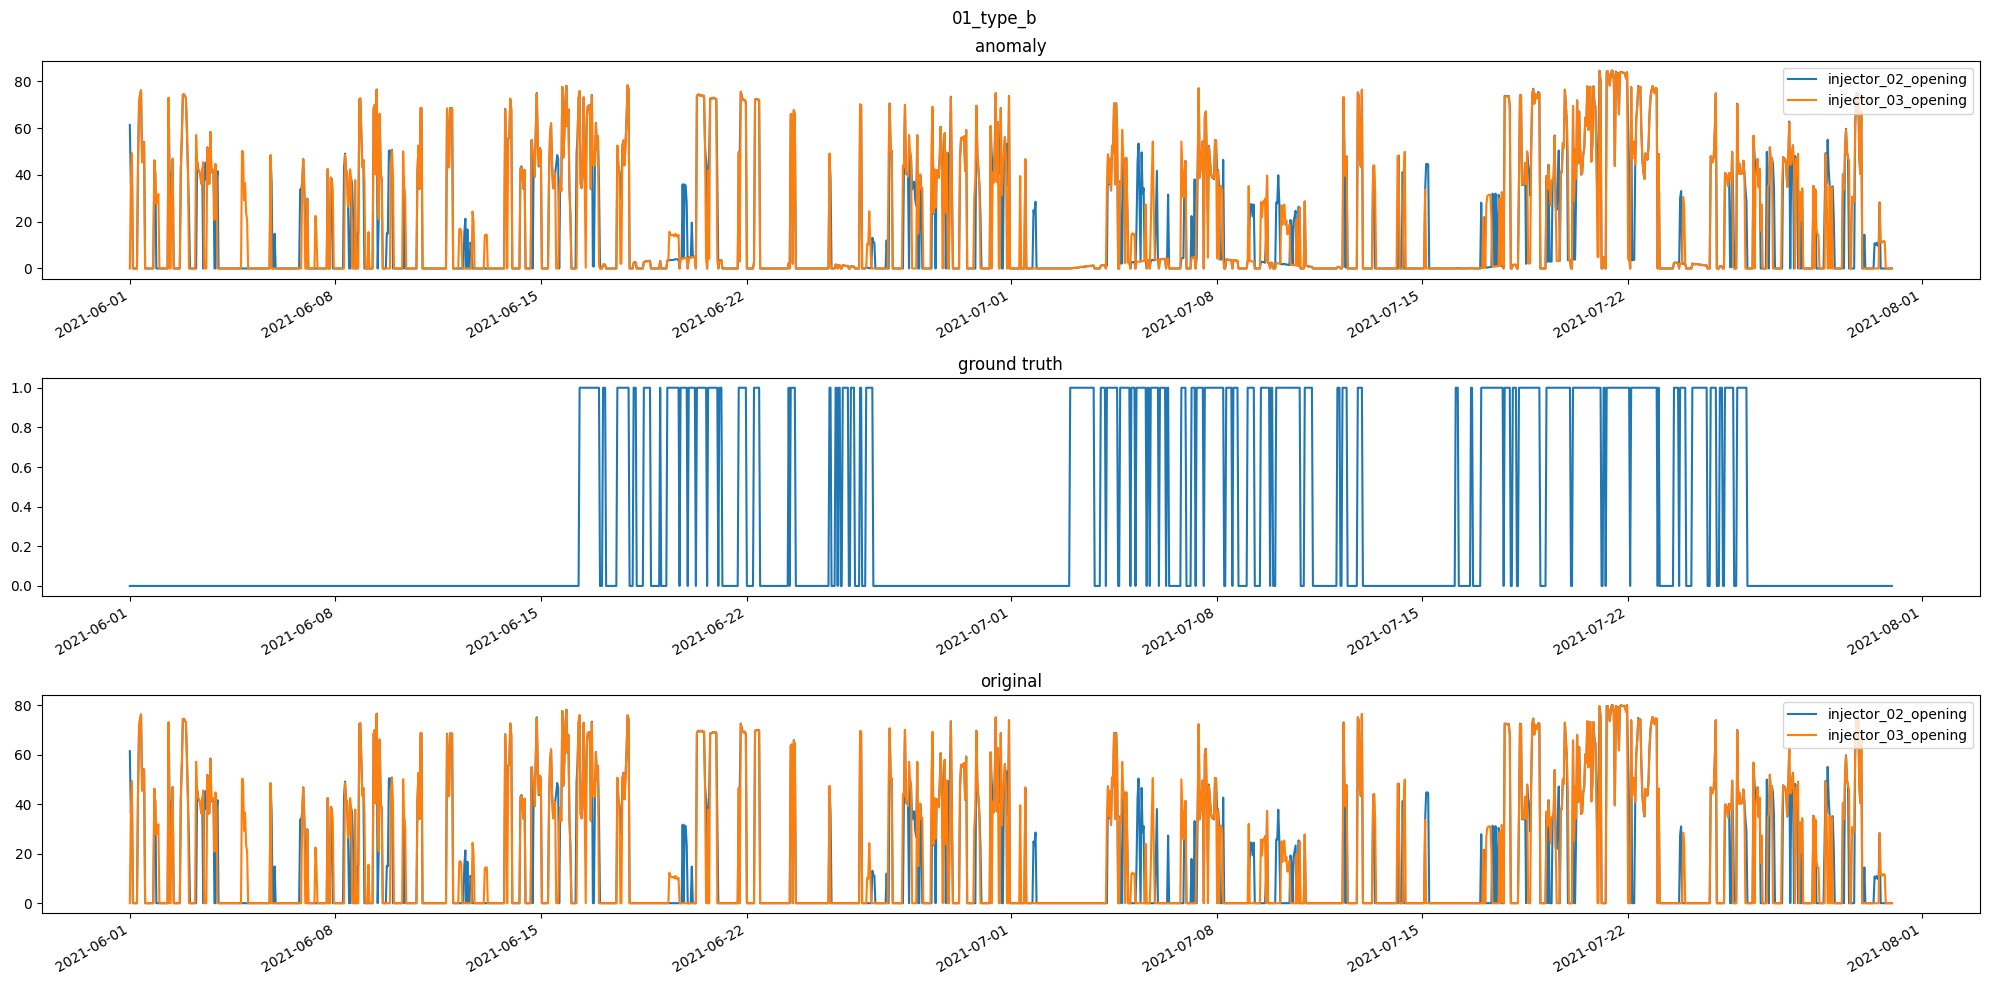

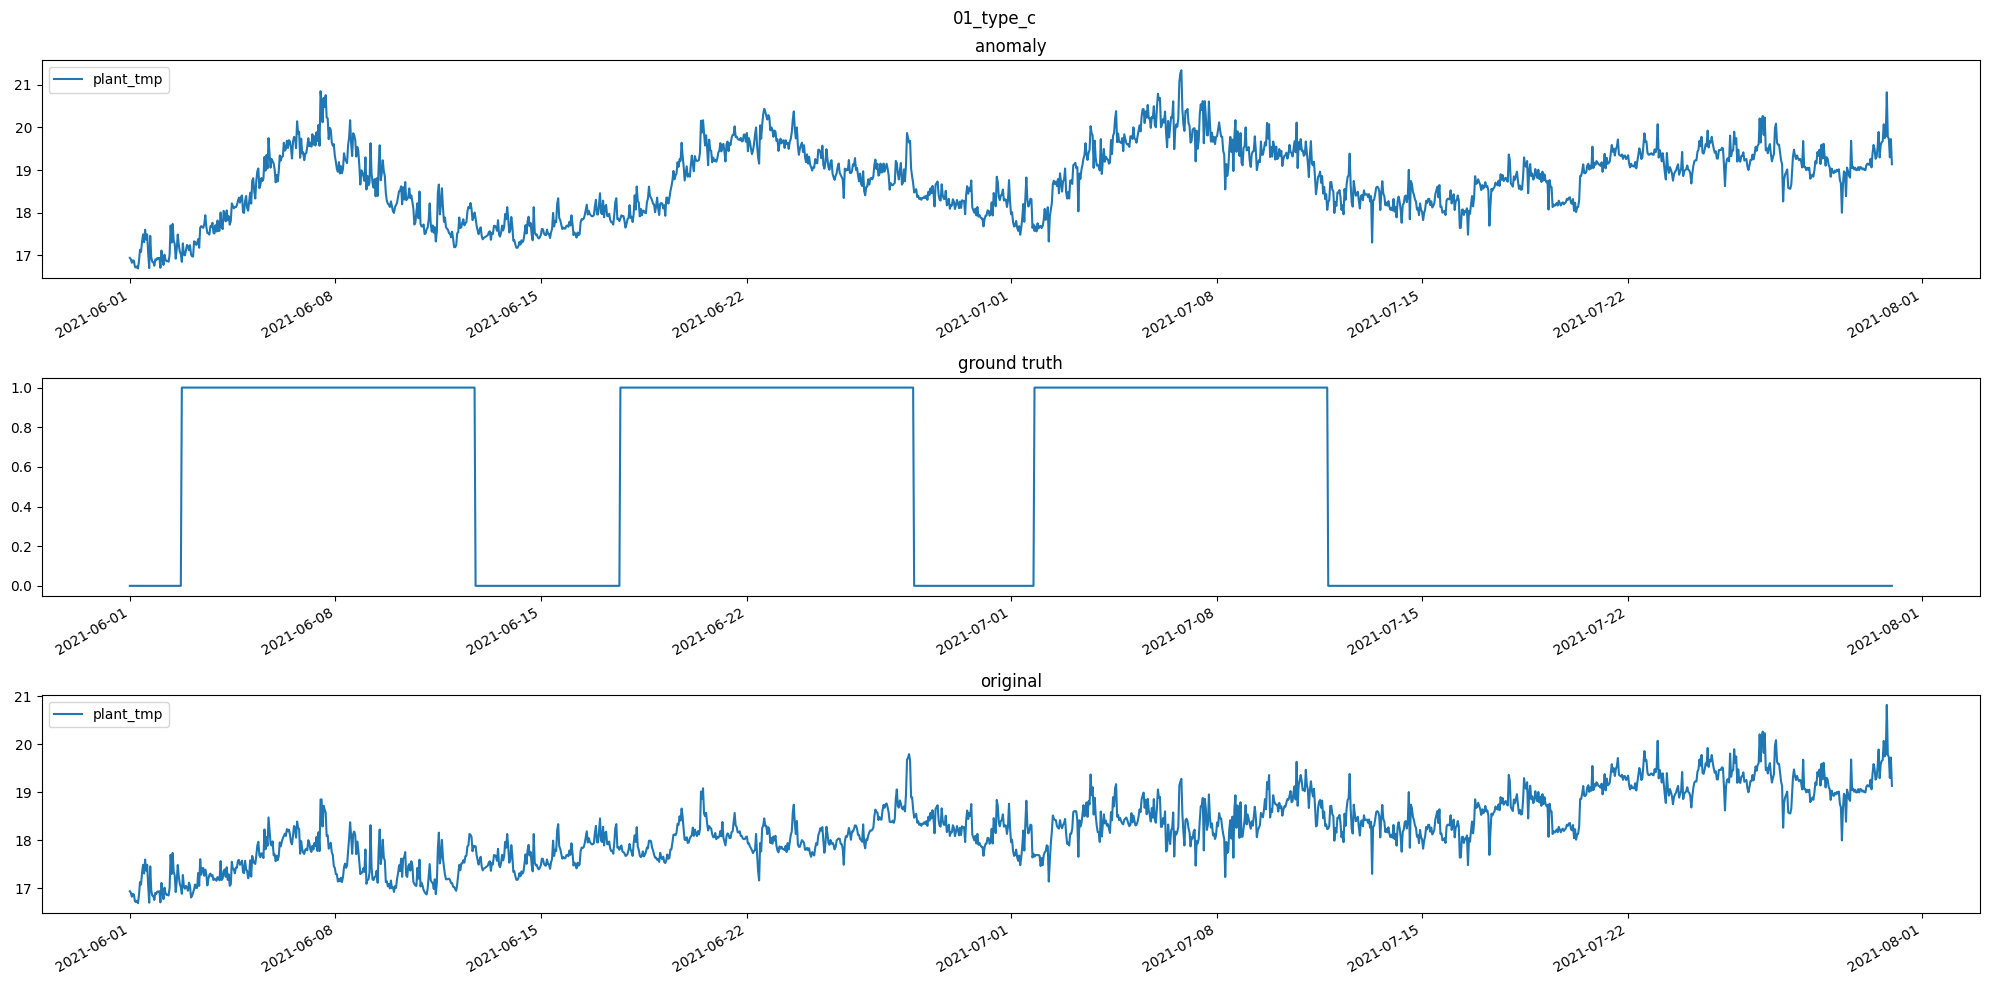

In [ ]:

df = rds_u5.data_dict["test_s01"].measurements
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_56_cols, f_args={"max_y": 5, "sigma": 0.1}, random_seed=10, title="01_type_a", unit="VG5"))
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_control_cols, f_args={"max_y": 5, "sigma": 0.1}, random_seed=15, title="01_type_b", unit="VG5"))
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_cooling_cols, f_args={"max_y": 2, "sigma": 0.1}, random_seed=12, title="01_type_c", unit="VG5", only_for_machine_on_state=False))

df = rds_u6.data_dict["test_s01"].measurements
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_56_cols, f_args={"max_y": 5, "sigma": 0.1}, random_seed=21, title="01_type_a", unit="VG6"))
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_control_cols, f_args={"max_y": 5, "sigma": 0.1}, random_seed=25, title="01_type_b", unit="VG6"))
create_anomaly(df, AnomalyDef(anomaly_f=ramp_anomaly, columns=anomaly_cooling_cols, f_args={"max_y": 2, "sigma": 0.1}, random_seed=22, title="01_type_c", unit="VG6", only_for_machine_on_state=False))

In [ ]:
import random
anomaly_jump_cols = df.columns[df.columns.str.endswith("_tmp") & (~df.columns.isin(["ext_tmp", "plant_tmp"])) ]
random.seed(1234)
random_temp_1 = random.sample(list(anomaly_jump_cols), 8)
random_temp_2 = random.sample(list(anomaly_jump_cols), 8)
random_temp_3 = random.sample(list(anomaly_jump_cols), 8)
random_temp_4 = random.sample(list(anomaly_jump_cols), 8)
random_temp_5 = random.sample(list(anomaly_jump_cols), 8)
random_temp_6 = random.sample(list(anomaly_jump_cols), 8)

pd.DataFrame([random_temp_1, random_temp_2, random_temp_3, random_temp_4, random_temp_5, random_temp_6])

0                      1                      2  \
0     water_circ_hot_tmp  stat_coil_ph03_05_tmp    air_circ_hot_02_tmp   
1  water_circ_hot_02_tmp   air_circ_cold_06_tmp    air_circ_hot_01_tmp   
2  stat_coil_ph02_05_tmp       stat_magn_12_tmp       stat_magn_10_tmp   
3    air_circ_hot_06_tmp  water_circ_hot_03_tmp    air_circ_hot_02_tmp   
4    water_circ_cold_tmp       stat_magn_05_tmp  stat_coil_ph03_06_tmp   
5       stat_magn_08_tmp   air_circ_cold_03_tmp  stat_coil_ph01_06_tmp   

                       3                      4                      5  \
0   air_circ_cold_01_tmp   air_circ_cold_06_tmp       stat_magn_08_tmp   
1  stat_coil_ph02_05_tmp  stat_coil_ph01_04_tmp   air_circ_cold_02_tmp   
2       stat_magn_01_tmp  water_circ_hot_05_tmp  stat_coil_ph03_06_tmp   
3   air_circ_cold_01_tmp       stat_magn_03_tmp       stat_magn_02_tmp   
4   air_circ_cold_05_tmp       stat_magn_09_tmp  water_circ_hot_01_tmp   
5       stat_magn_06_tmp   air_circ_cold_05_tmp       stat_magn_12_tmp   

                       6                      7  
0   air_circ_cold_03_tmp    water_circ_cold_tmp  
1     water_circ_hot_tmp  water_circ_hot_01_tmp  
2    air_circ_hot_04_tmp   air_circ_cold_06_tmp  
3  stat_coil_ph01_04_tmp   air_circ_cold_05_tmp  
4   air_circ_cold_06_tmp       stat_magn_03_tmp  
5  stat_coil_ph02_02_tmp       stat_magn_01_tmp

171495


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-11 23:34:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-11 23:34:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-21 23:34:00+01:

171495


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-15 01:30:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-15 01:55:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-25 01:55:30+01:

171495


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-02 05:54:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-02 05:54:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-12 05:54:30+01:

171542


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-01 08:55:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-02 16:50:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-12 16:50:30+01:

171542


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-16 04:44:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-16 05:57:30+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-26 05:57:30+01:

171542


C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-02 17:46:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "sample_time"] = df.index[start_index]
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-02 17:46:00+01:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  anomaly_info.loc[id_c, "start_time"] = shift_anomaly_date(anomaly_info.loc[id_c, "sample_time"], df)
C:\Users\Raffael\AppData\Local\Temp\ipykernel_22748\1010548670.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2021-11-12 17:46:00+01:

delta                sample_time  start_index                 start_time  \
0   5012  2021-11-02 17:46:00+01:00       5012.0  2021-11-02 17:46:00+01:00   
1  14091  2021-11-17 17:35:00+01:00      47904.0  2021-11-17 17:35:00+01:00   
2  11700  2021-12-01 20:50:00+01:00      88405.0  2021-12-01 20:50:00+01:00   

                    end_time  end_index                 data_start  \
0  2021-11-12 17:46:00+01:00    33813.0  2021-11-02 17:46:00+01:00   
1  2021-11-27 17:35:00+01:00    76705.0  2021-11-17 17:35:00+01:00   
2  2021-12-11 20:50:00+01:00   117206.0  2021-12-01 20:50:00+01:00   

                    data_end anomaly_length  
0  2021-11-12 17:46:00+01:00          14694  
1  2021-11-25 18:03:30+01:00           9439  
2  2021-12-11 17:02:00+01:00          14755

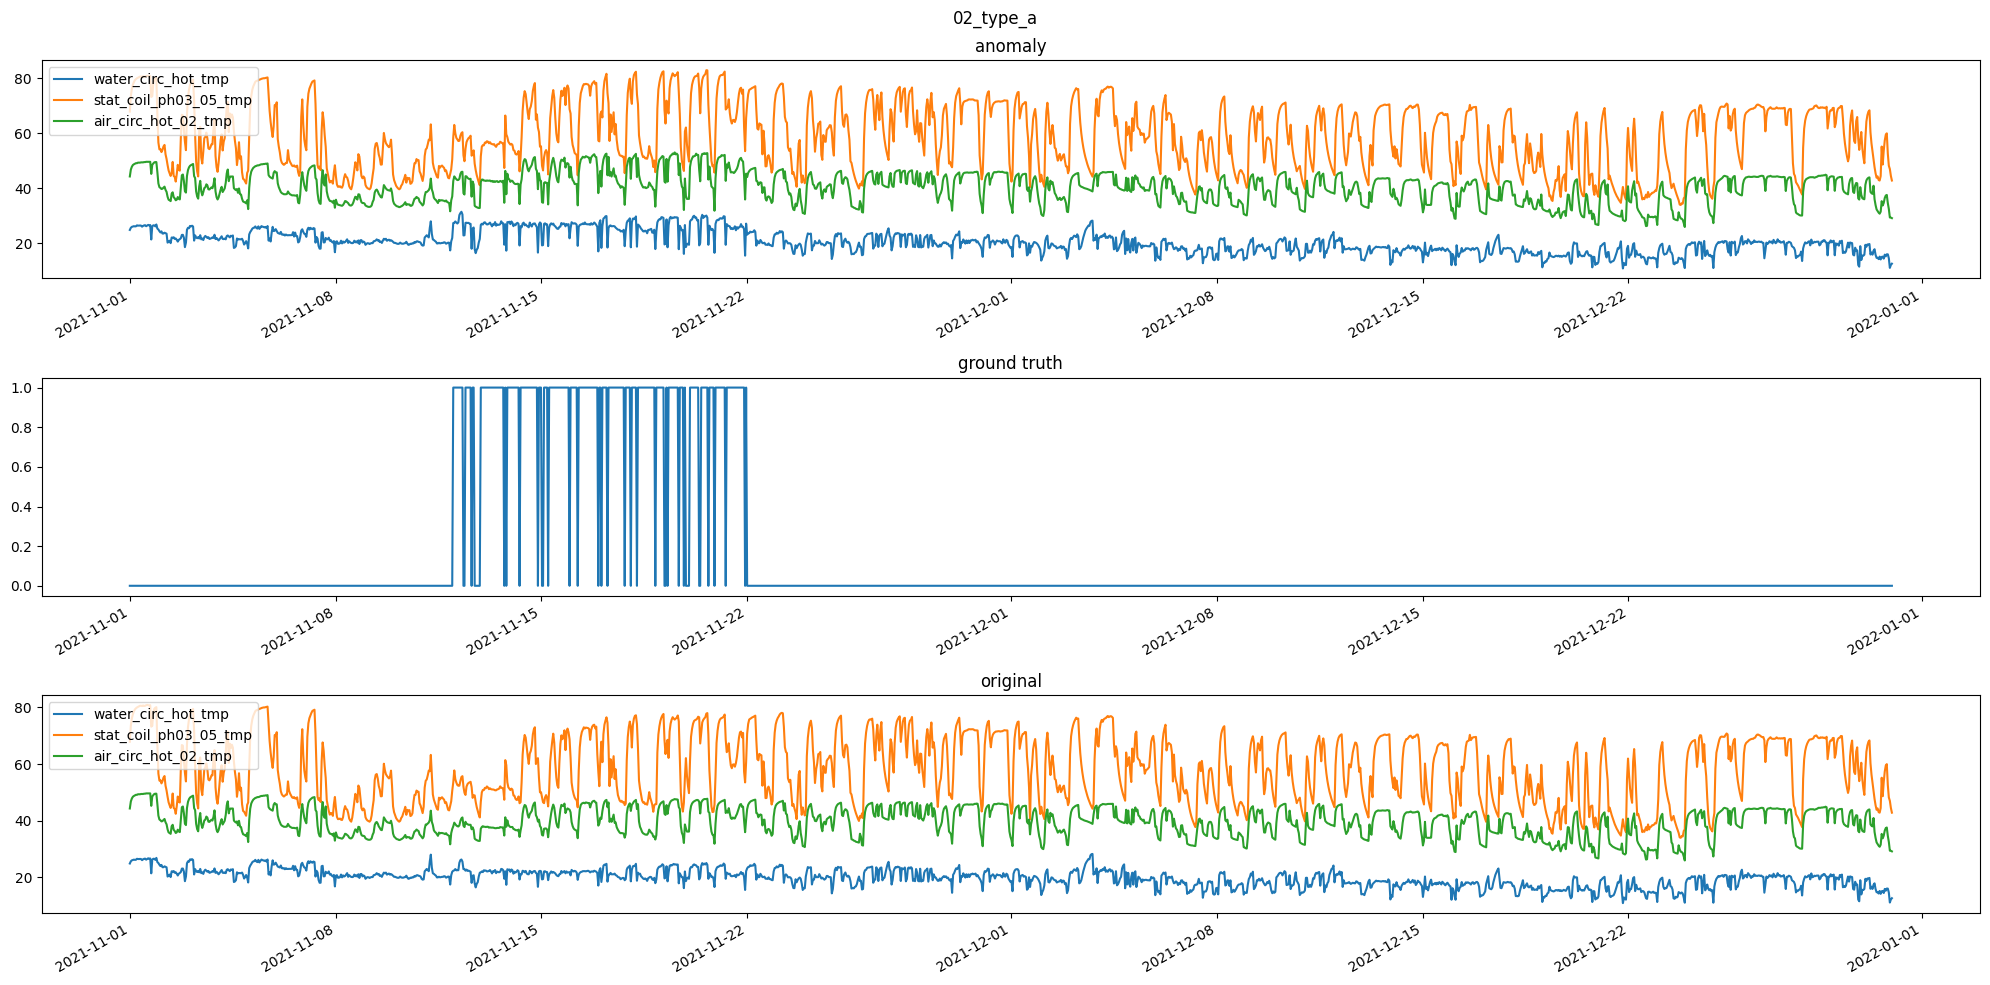

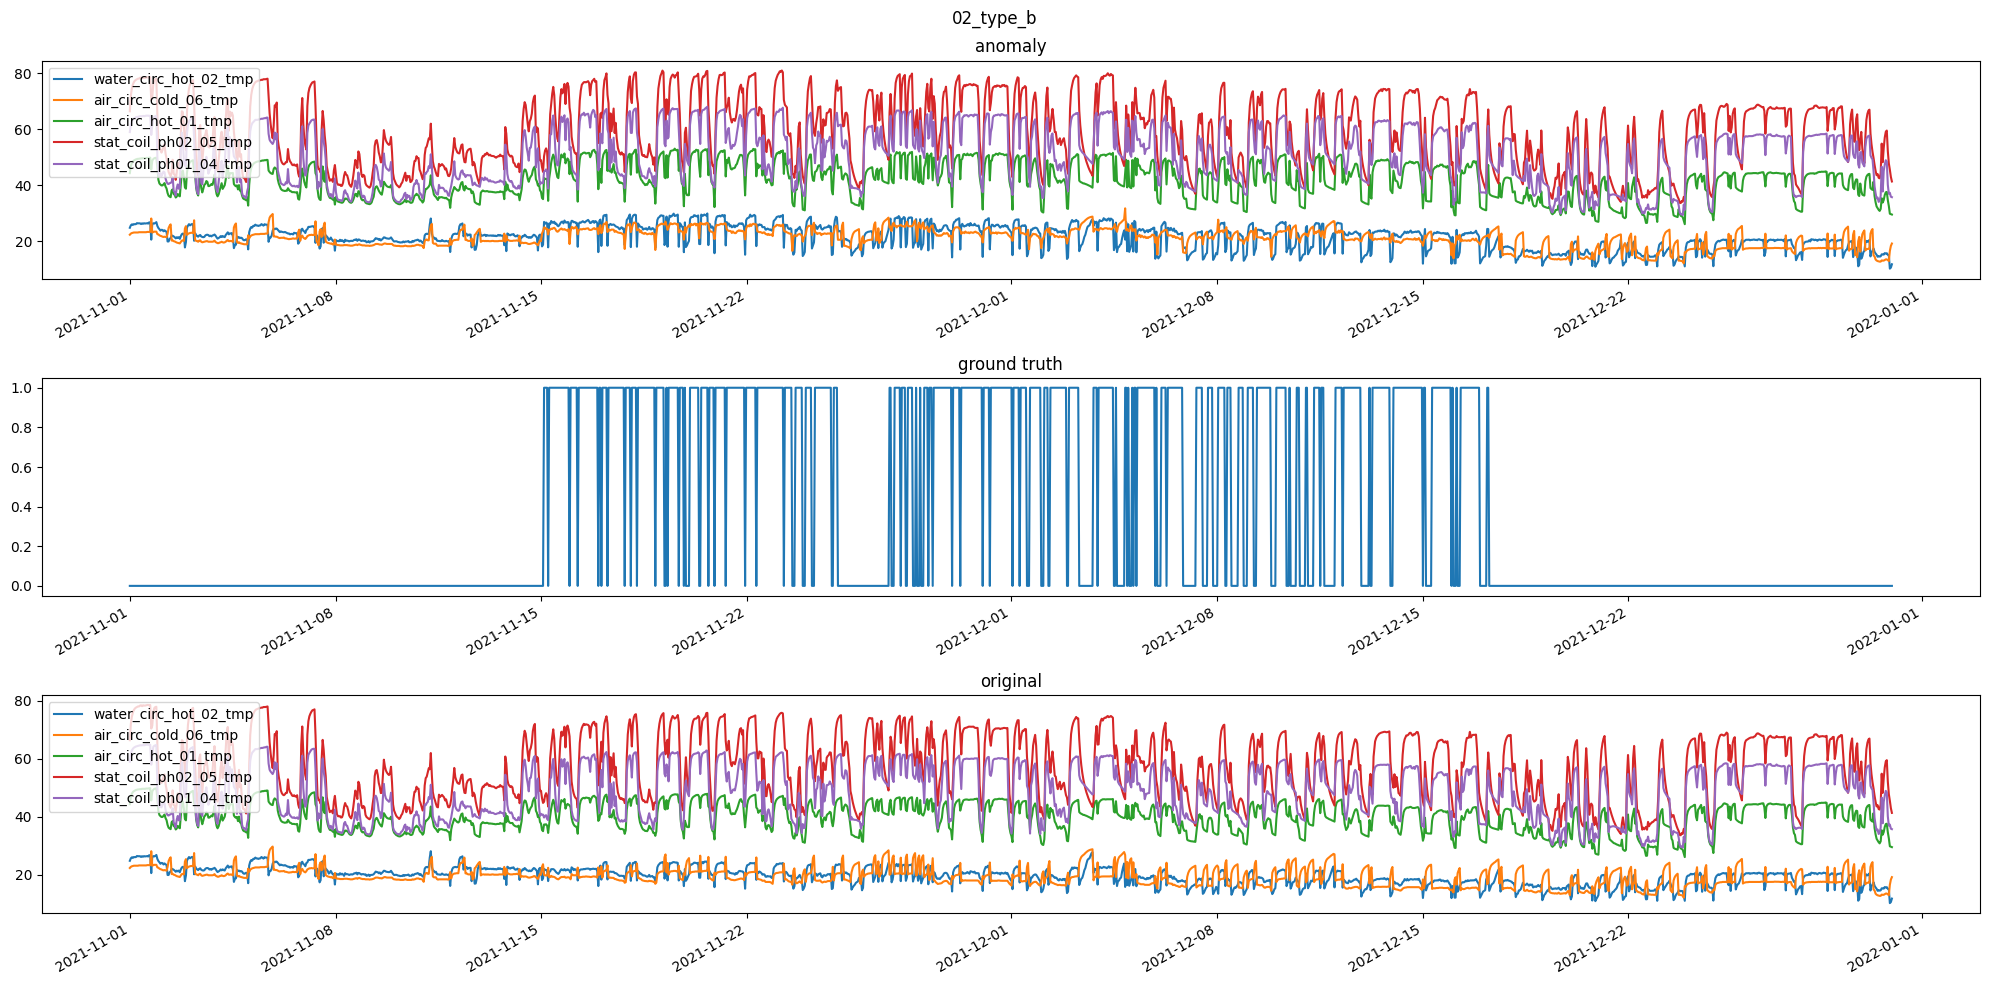

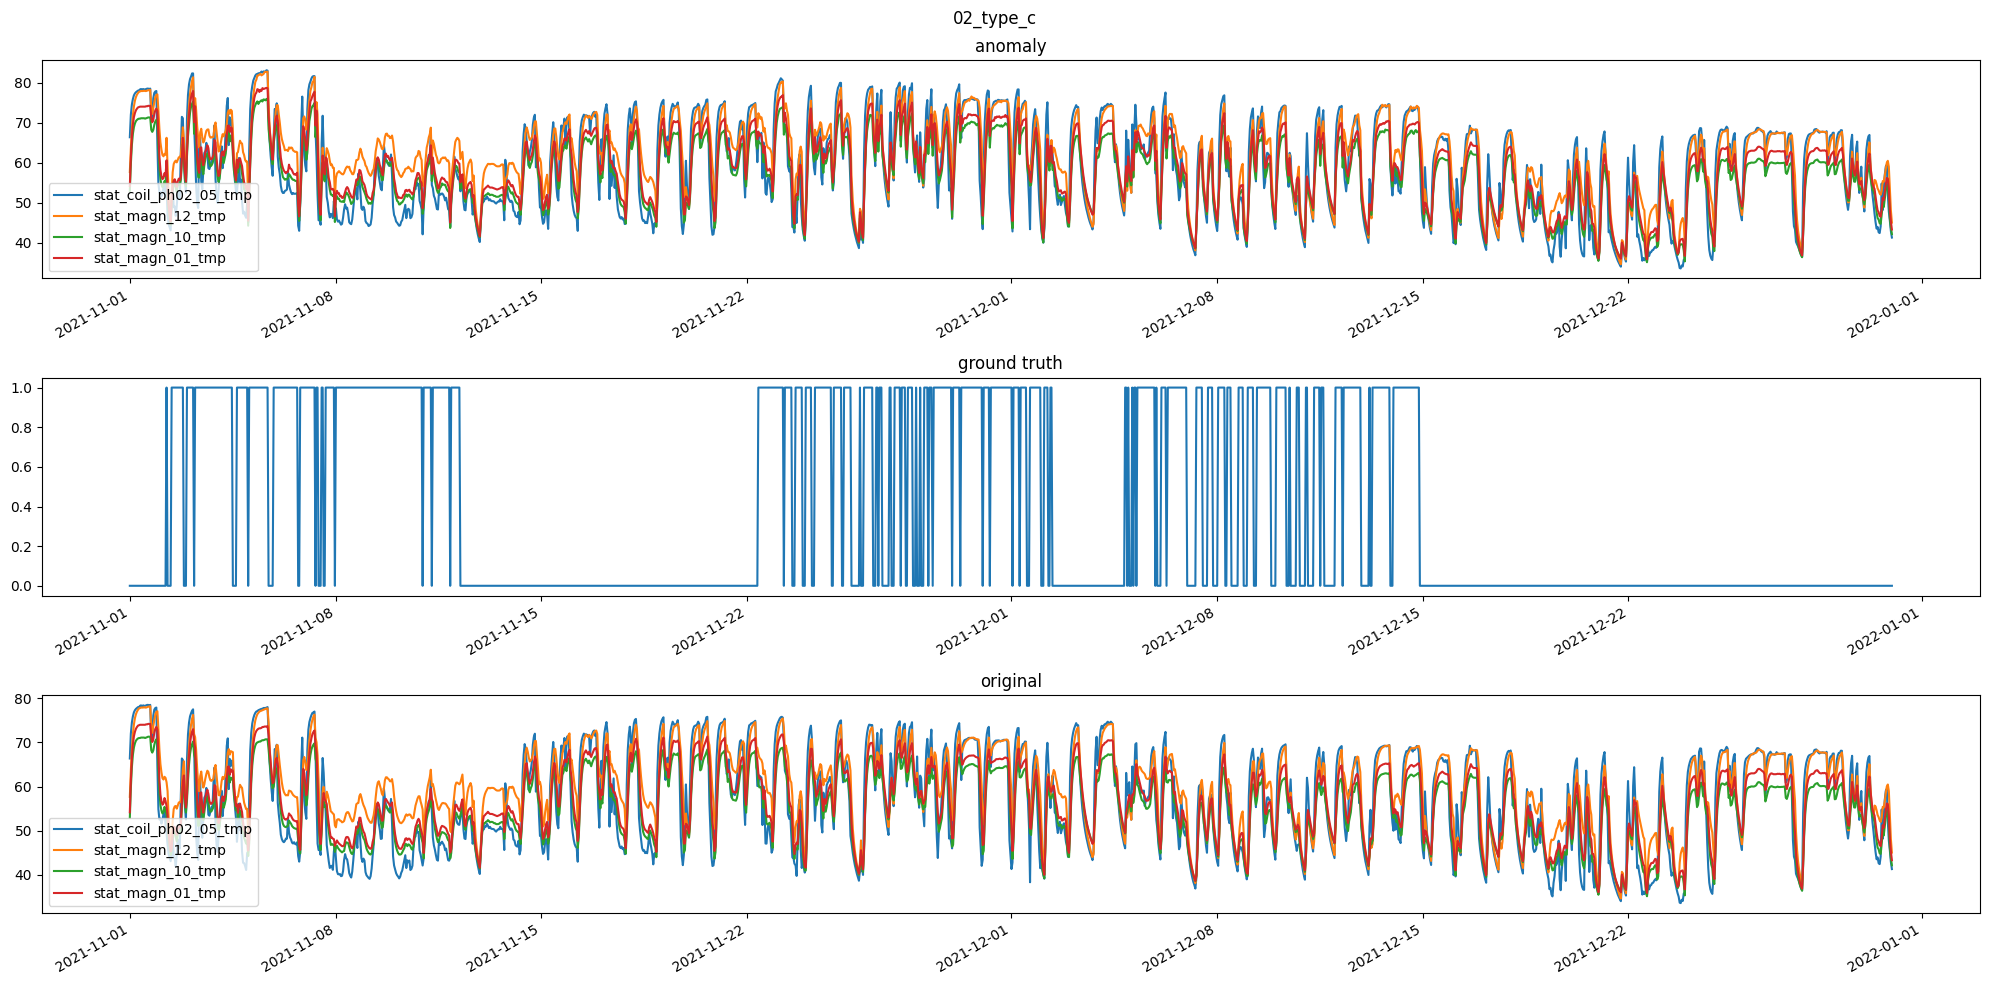

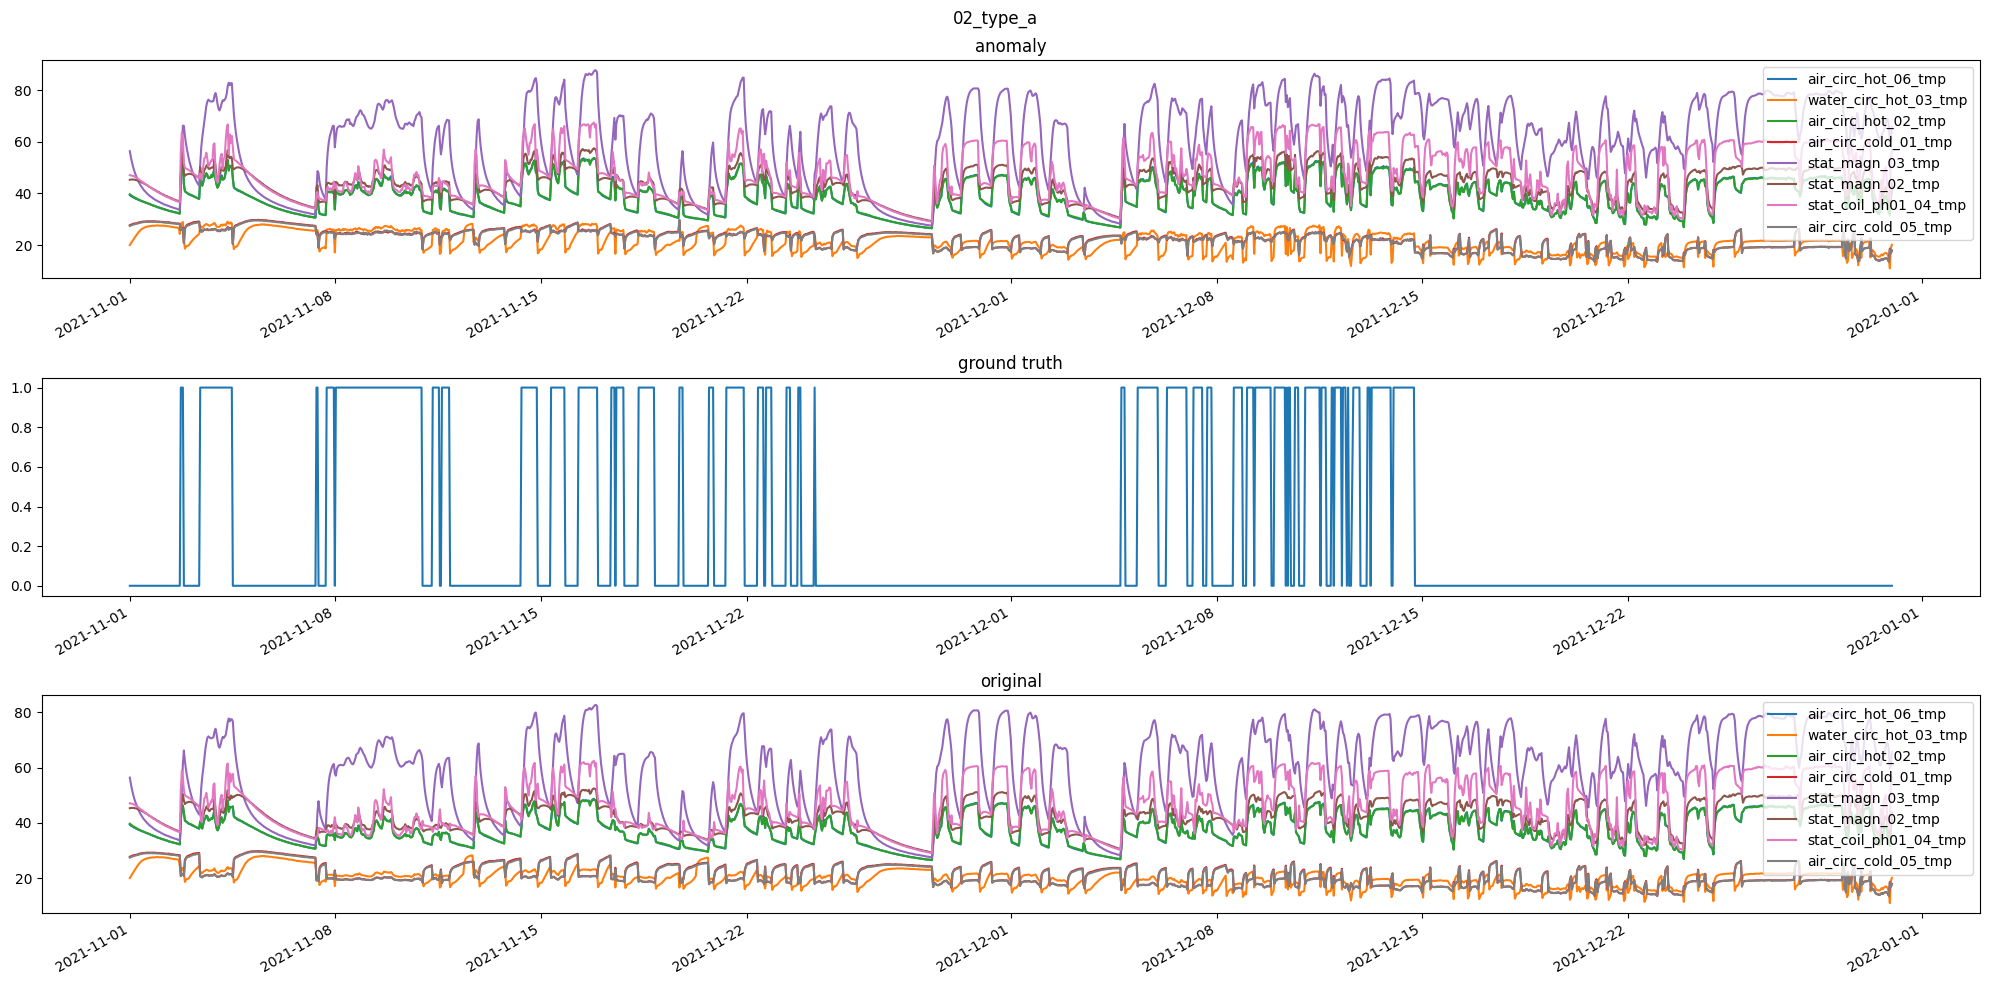

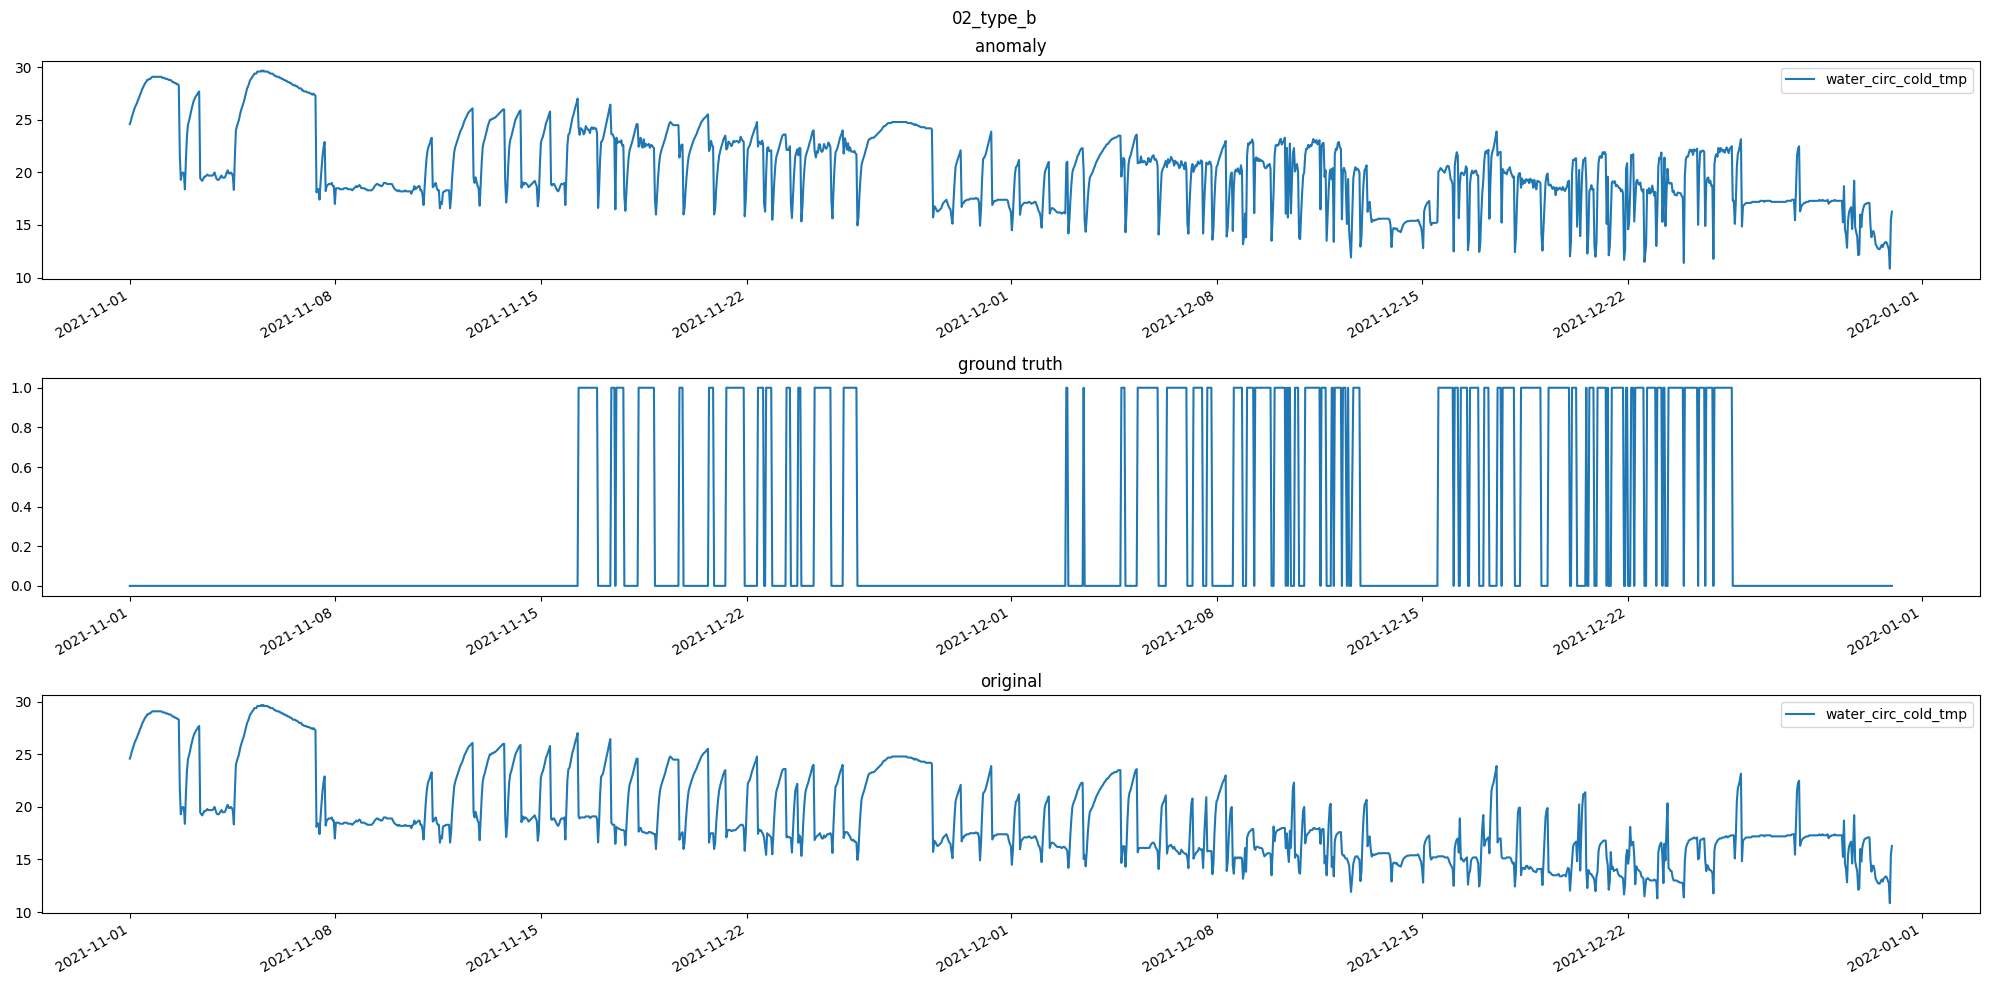

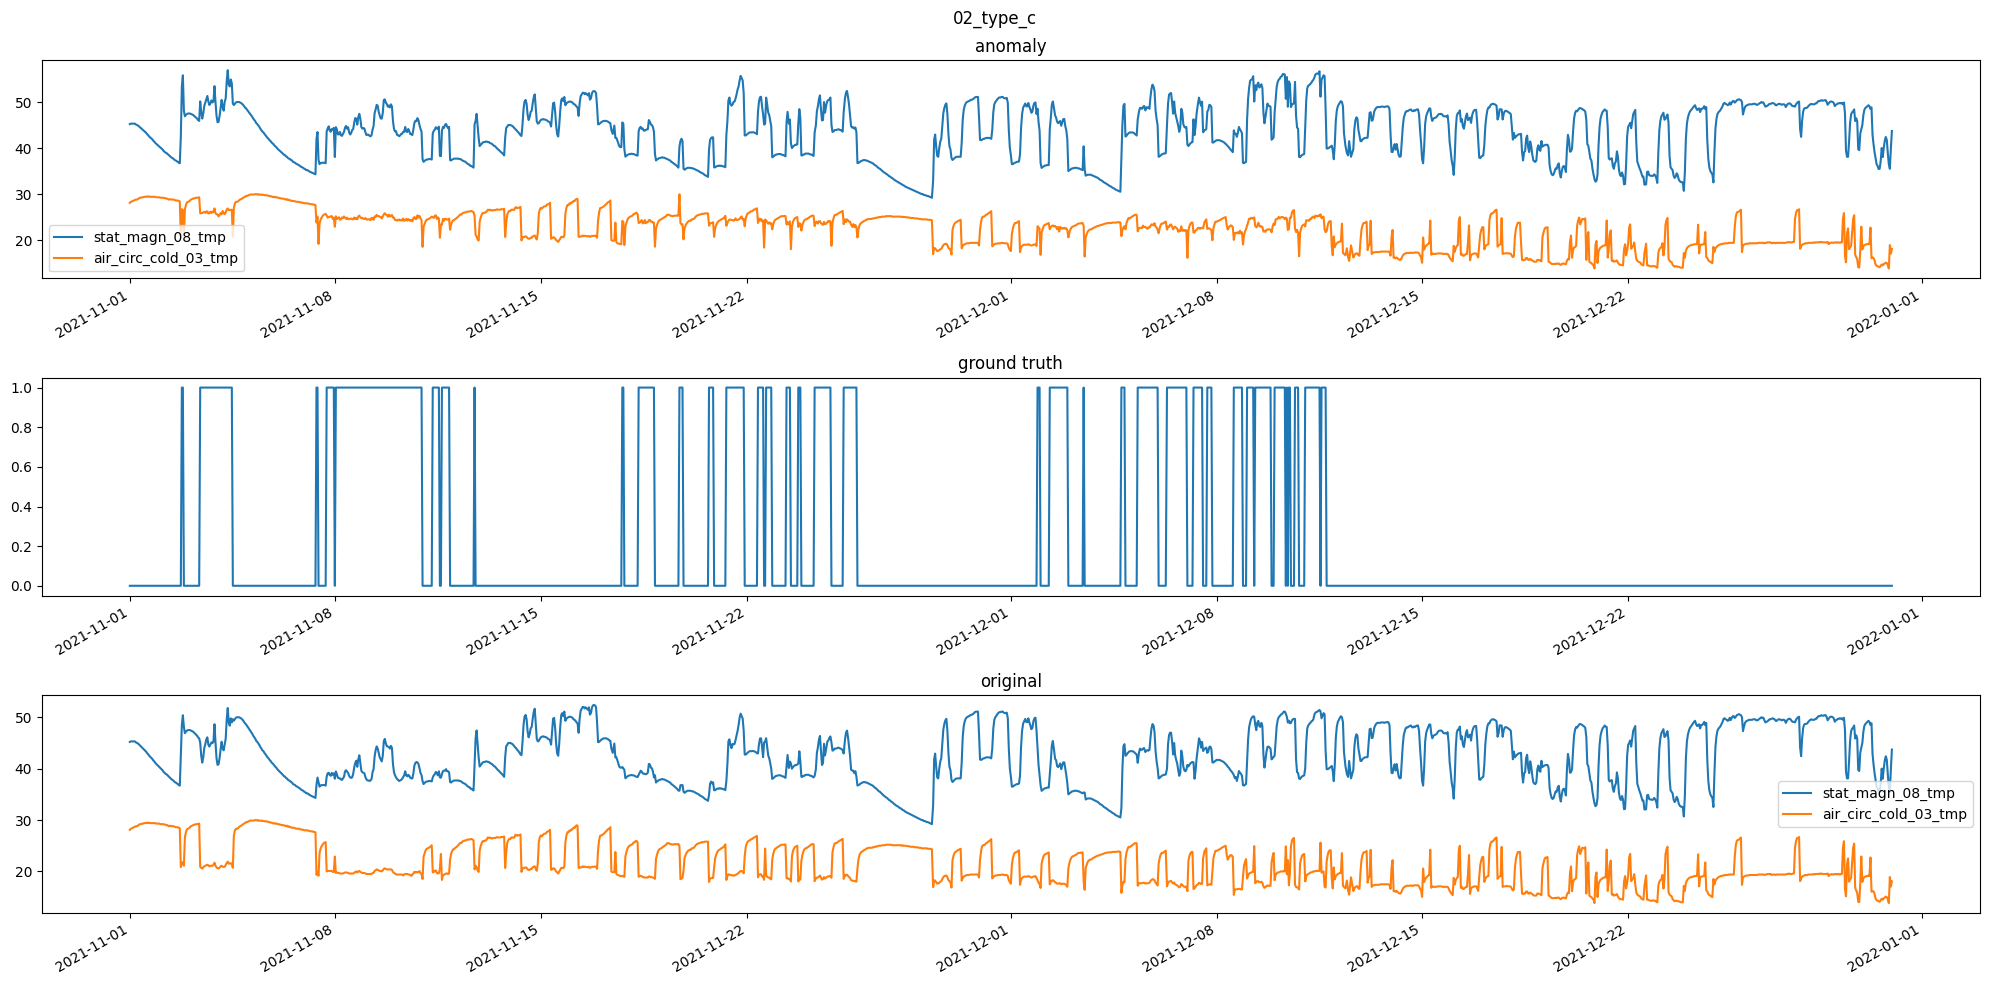

In [ ]:

df = rds_u5.data_dict["test_s02"].measurements
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_1[0:3], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=10, title="02_type_a", unit="VG5", N_anomalies=1))
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_2[0:5], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=15, title="02_type_b", unit="VG5"))
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_3[0:4], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=12, title="02_type_c", unit="VG5"))

df = rds_u6.data_dict["test_s02"].measurements
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_4[0:8], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=21, title="02_type_a", unit="VG6"))
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_5[0:1], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=25, title="02_type_b", unit="VG6"))
create_anomaly(df, AnomalyDef(anomaly_f=constant_anomaly, columns=random_temp_6[0:2], f_args={"max_y": 5.0, "sigma": 0.2}, random_seed=22, title="02_type_c", unit="VG6"))

<Axes: >

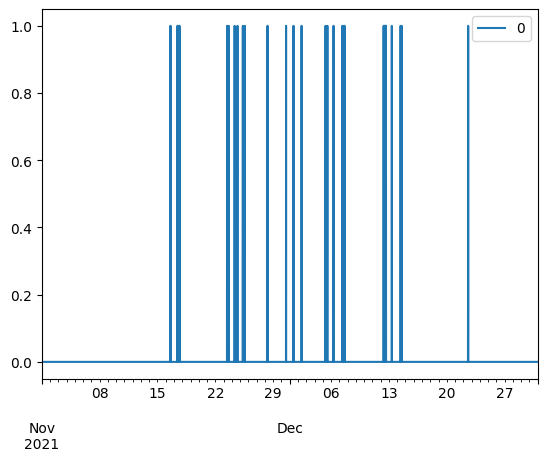

In [ ]:
df = rds_u5.data_dict["test_s02"].measurements
full_date_range = pd.date_range(df.index.min(), end = df.index.max(), freq=datetime.timedelta(seconds=30))
pd.DataFrame((~full_date_range.isin(df.index)), index=full_date_range).astype(int).plot()